In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [294]:
df_var = pd.read_excel("Election_Data.xlsx")
df_var

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [2]:
dict1 = pd.read_excel("Election_Data.xlsx", sheet_name=['Election_Dataset_Two Classes'])

In [3]:
df_elec = pd.concat(dict1[frame] for frame in dict1.keys())
df_elec

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


##### 1)  Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it.

In [4]:
df_elec.describe(include='all')

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525.000000,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,NaN,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,763.000000,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,440.373894,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,1.000000,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,382.000000,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,763.000000,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,1144.000000,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [5]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [6]:
df_elec.shape

(1525, 10)

In [7]:
df = df_elec.drop(['Unnamed: 0'], axis=1)

In [8]:
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [9]:
df.mean()

age                        54.182295
economic.cond.national      3.245902
economic.cond.household     3.140328
Blair                       3.334426
Hague                       2.746885
Europe                      6.728525
political.knowledge         1.542295
dtype: float64

In [10]:
df.median()

age                        53.0
economic.cond.national      3.0
economic.cond.household     3.0
Blair                       4.0
Hague                       2.0
Europe                      6.0
political.knowledge         2.0
dtype: float64

In [11]:
df.mode()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,37,3,3,4,2,11,2,female


In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [13]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [14]:
df.isnull().sum().sum()

0

In [15]:
df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [16]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [17]:
df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [18]:
df.gender.value_counts()

female    812
male      713
Name: gender, dtype: int64

In [19]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [20]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print('\n')
        print('Feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



Feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


Feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [21]:
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1520,0,67,5,3,2,4,11,3,1
1521,0,73,2,2,4,4,8,2,1
1522,1,37,3,3,5,4,2,2,1
1523,0,61,3,3,1,4,11,2,1


In [22]:
Elec_df = pd.get_dummies(df, drop_first=True)
Elec_df.head().T

,0,1,2,3,4
vote,1,1,1,1,1
age,43,36,35,24,41
economic.cond.national,3,4,4,4,2
economic.cond.household,3,4,4,2,2
Blair,4,4,5,2,1
Hague,1,4,2,1,1
Europe,2,5,3,4,6
political.knowledge,2,2,2,0,2
gender,0,1,1,0,1


##### 2) Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

#### Univariate Analysis

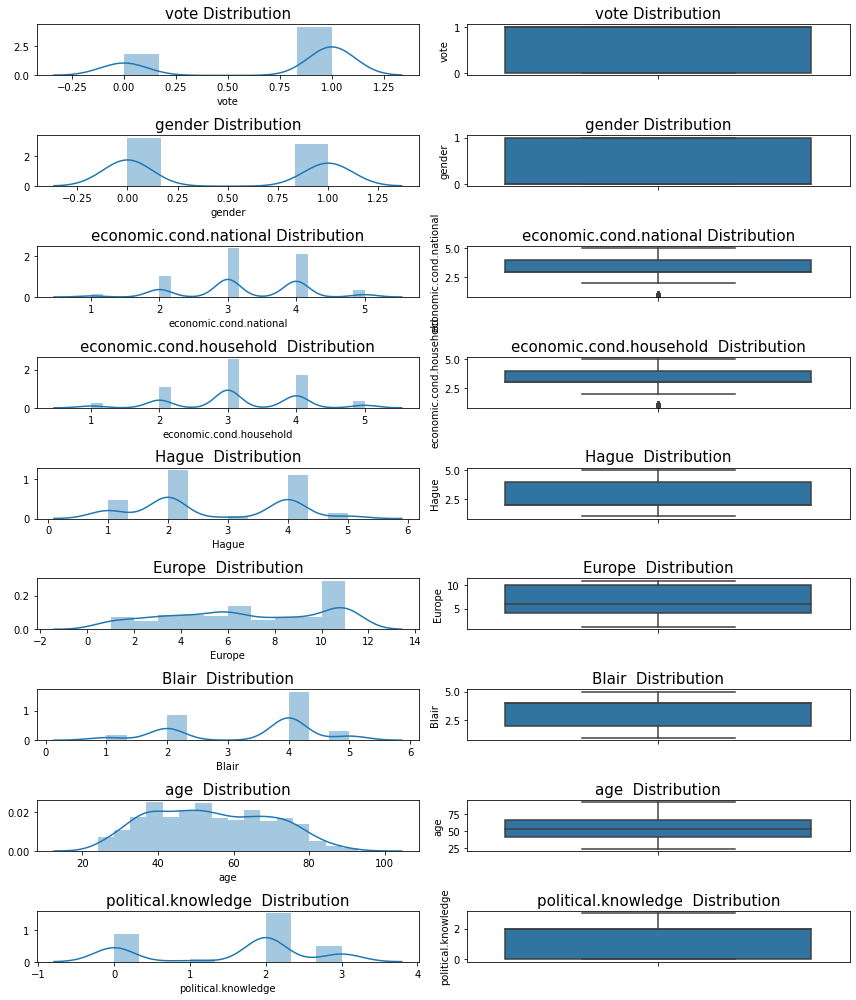

In [23]:
fig, axes = plt.subplots(nrows=9,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df['vote'] , ax=axes[0][0])
a.set_title("vote Distribution",fontsize=15)

a = sns.boxplot(df['vote'] , orient = "v" , ax=axes[0][1])
a.set_title("vote Distribution",fontsize=15)

a = sns.distplot(df['gender'] , ax=axes[1][0])
a.set_title("gender Distribution",fontsize=15)

a = sns.boxplot(df['gender'] , orient = "v" , ax=axes[1][1])
a.set_title("gender Distribution",fontsize=15)

a = sns.distplot(df['economic.cond.national'] , ax=axes[2][0])
a.set_title("economic.cond.national Distribution",fontsize=15)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.national Distribution",fontsize=15)

a = sns.distplot(df['economic.cond.household'] , ax=axes[3][0])
a.set_title("economic.cond.household  Distribution",fontsize=15)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[3][1])
a.set_title("economic.cond.household  Distribution",fontsize=15)

a = sns.distplot(df['Hague'] , ax=axes[4][0])
a.set_title("Hague  Distribution",fontsize=15)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague  Distribution",fontsize=15)

a = sns.distplot(df['Europe'] , ax=axes[5][0])
a.set_title("Europe  Distribution",fontsize=15)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe  Distribution",fontsize=15)

a = sns.distplot(df['Blair'] , ax=axes[6][0])
a.set_title("Blair  Distribution",fontsize=15)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[6][1])
a.set_title("Blair  Distribution",fontsize=15)

a = sns.distplot(df['age'] , ax=axes[7][0])
a.set_title("age  Distribution",fontsize=15)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[7][1])
a.set_title("age  Distribution",fontsize=15)

a = sns.distplot(df['political.knowledge'] , ax=axes[8][0])
a.set_title("political.knowledge  Distribution",fontsize=15)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[8][1])
a.set_title("political.knowledge  Distribution",fontsize=15)


plt.tight_layout()
plt.show()

#### Bivarite Analysis

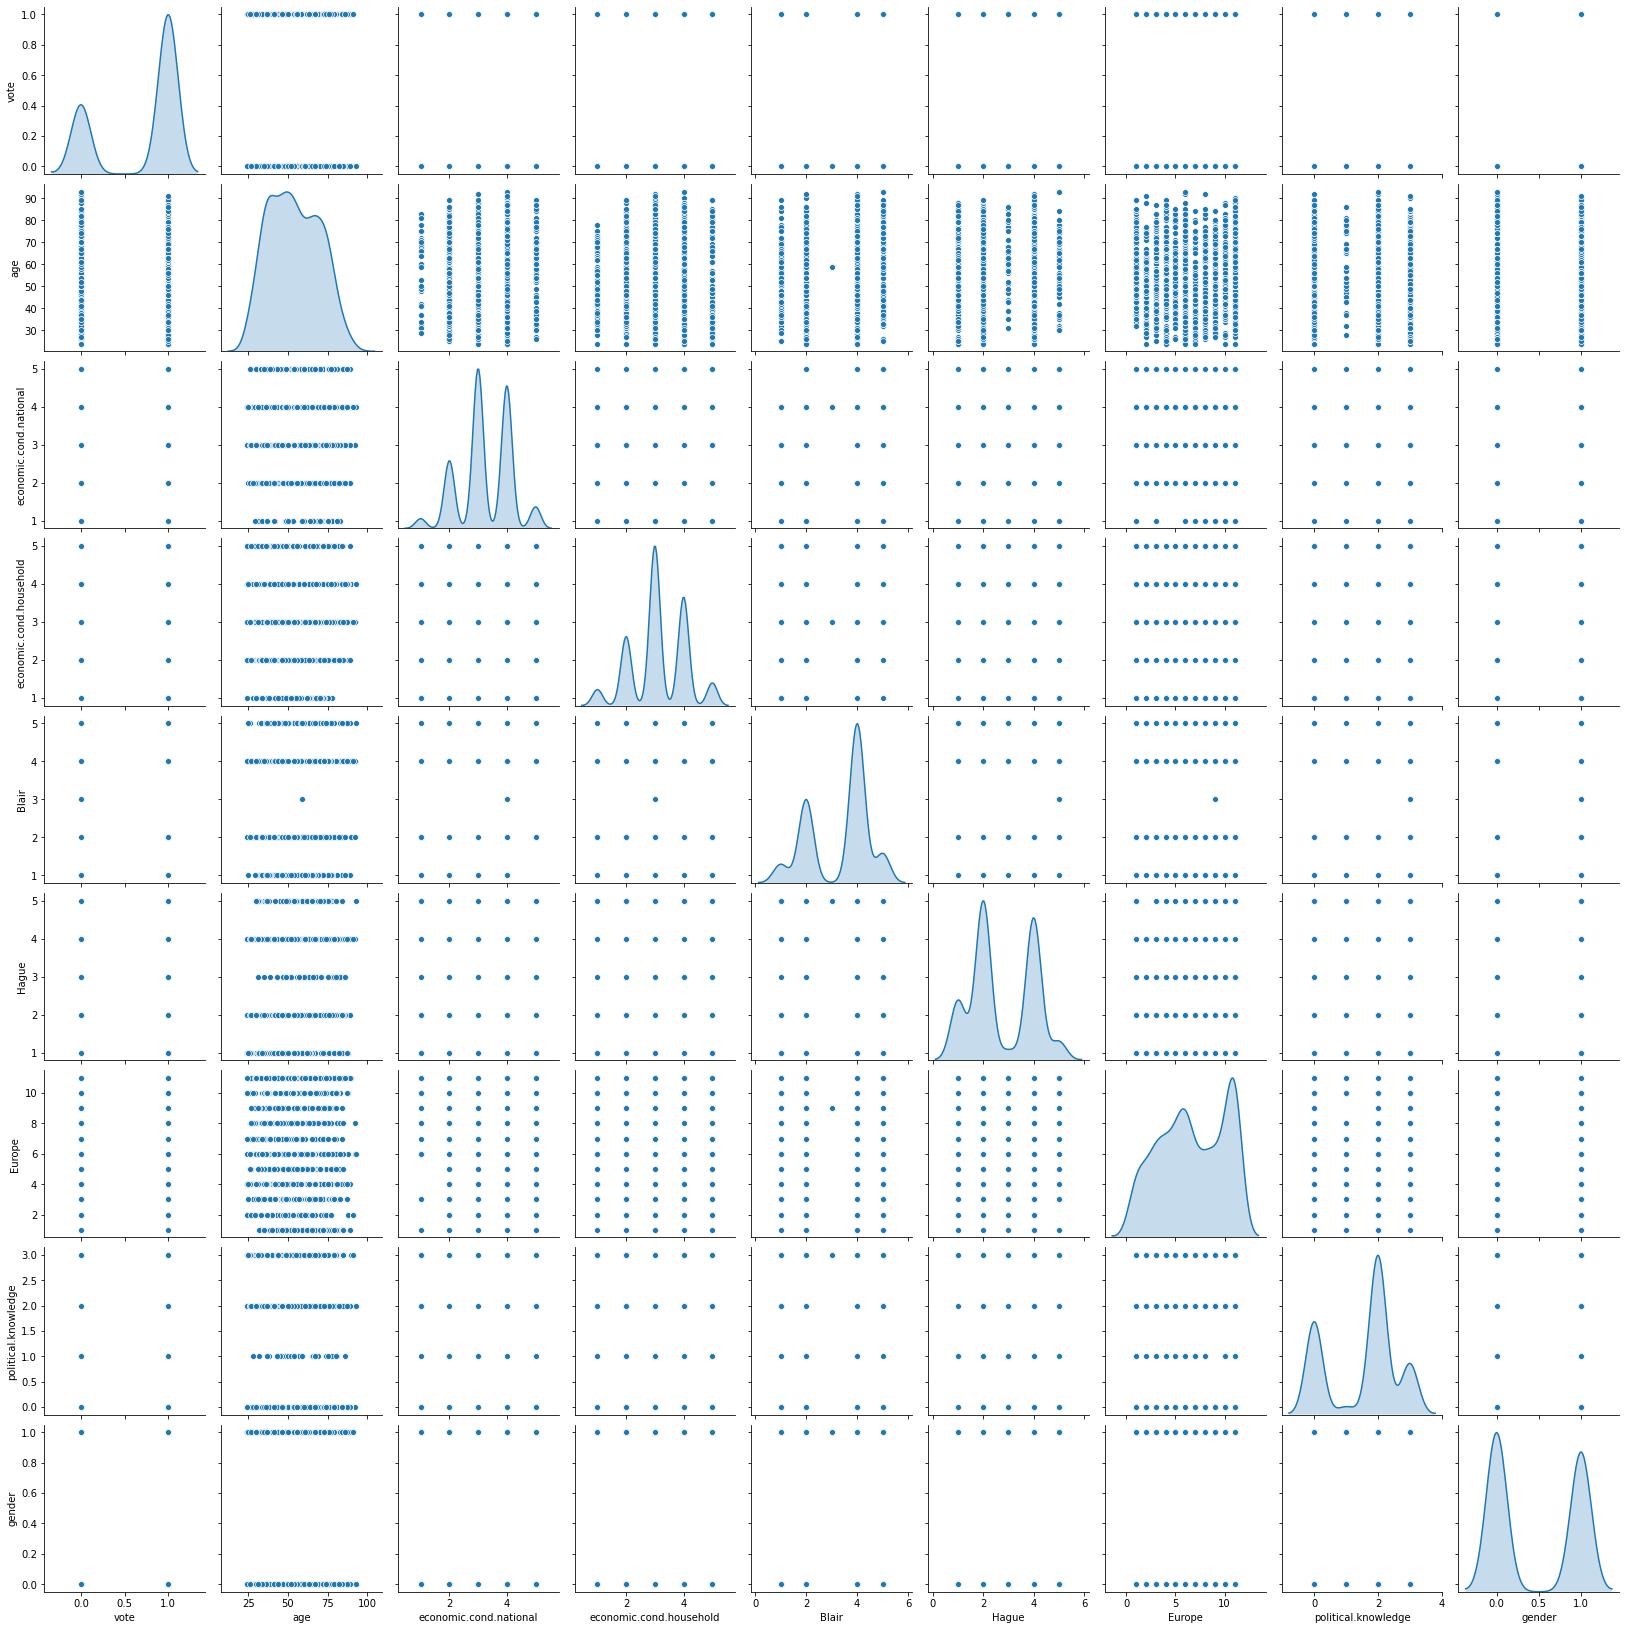

In [24]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  

plt.show()

#### Checking for Outliers

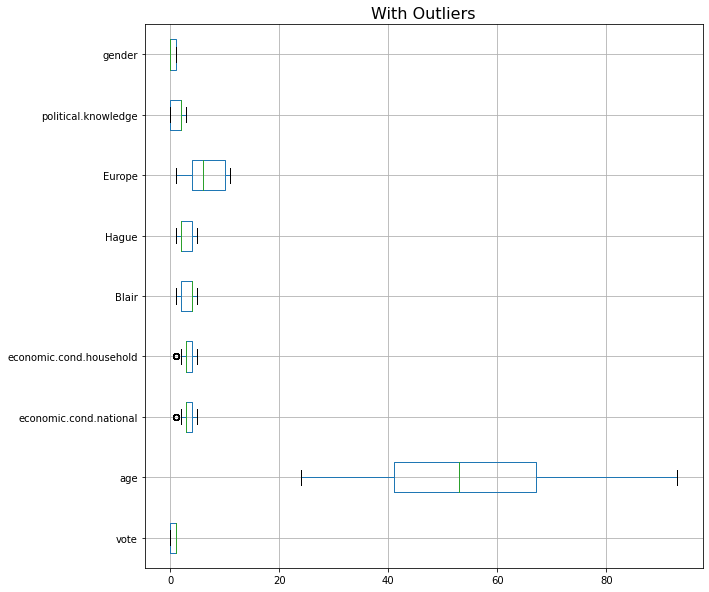

In [25]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

#### Removing Outliers

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [30]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

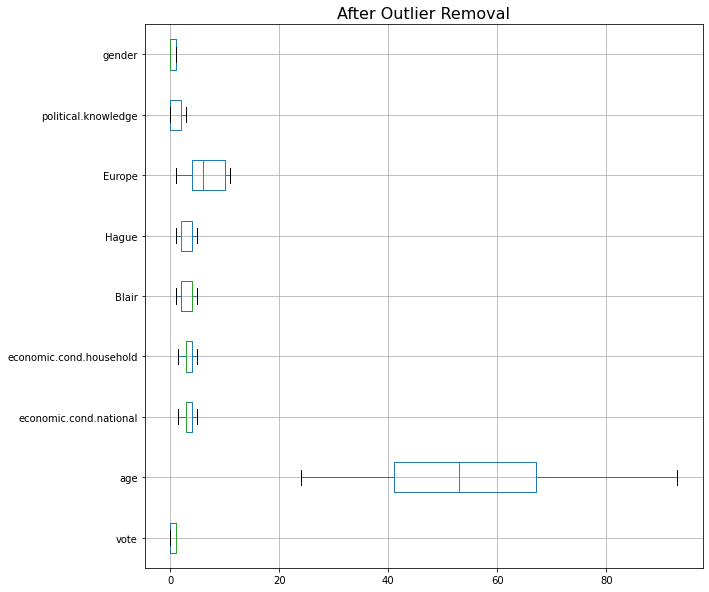

In [31]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

#### Correlation

<AxesSubplot:>

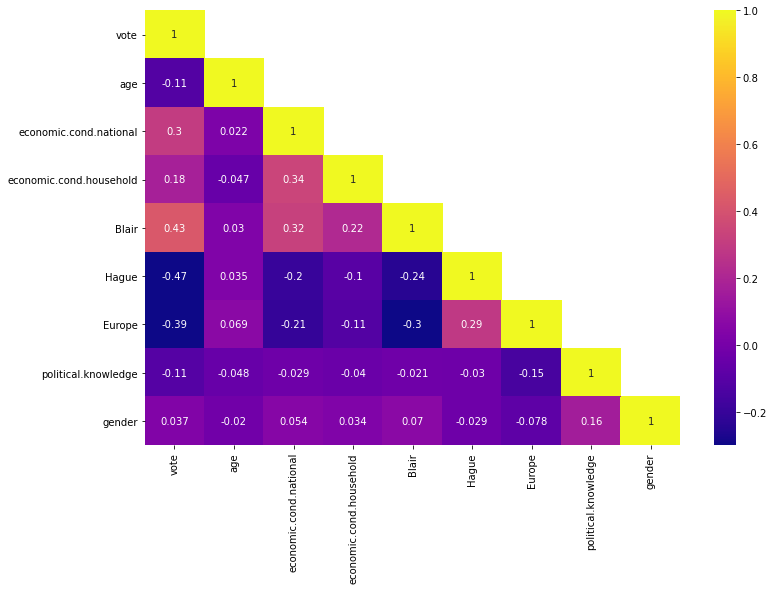

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr(),+1),cmap='plasma',vmin=-0.3,vmax=1)

#### Data Split

In [33]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = df[['vote']]

In [34]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0.0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1.0
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1.0
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0.0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1.0


In [35]:
y.head()

,vote
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [36]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

#### Logistic Regression and LDA 

In [37]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image  
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#### Logistic Regression

In [38]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

#### Predicting on Training and Test dataset

In [39]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

#### Getting the Predicted Classes and Probs

In [40]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.921946,0.078054
1,0.690526,0.309474
2,0.346669,0.653331
3,0.488887,0.511113
4,0.158897,0.841103


#### Model Evaluation

#### AUC and ROC for the training data

AUC: 0.890


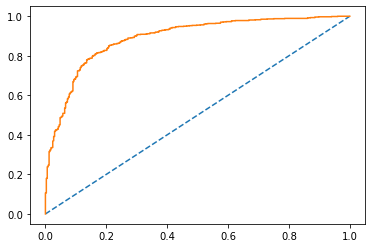

In [41]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LR_Train_Auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % LR_Train_Auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [42]:
# Accuracy - Train Data
LR_Train_Acc = model.score(X_train, y_train)
LR_Train_Acc

0.8406747891283973

AUC: 0.883


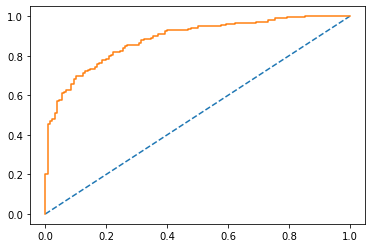

In [43]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LR_Test_Auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % LR_Test_Auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [44]:
# Accuracy - Test Data
LR_Test_Acc = model.score(X_test, y_test)
LR_Test_Acc

0.8209606986899564

#### Confusion Matrix for the training data

In [45]:
confusion_matrix(y_train, ytrain_predict)

array([[230, 102],
       [ 68, 667]], dtype=int64)

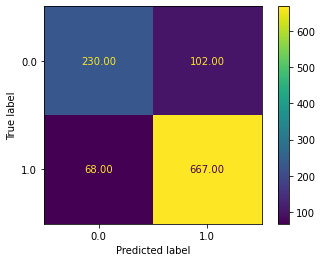

In [46]:
plot_confusion_matrix(model,X_train,y_train,values_format='0.2f');

In [47]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73       332
         1.0       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [48]:
LR = classification_report(y_train,ytrain_predict,output_dict=True)
df = pd.DataFrame(LR).transpose()
df
LR_Train_precision = round(df.loc["1.0"][0],2)
LR_Train_recall = round(df.loc["1.0"][1],2)
LR_Train_f1 = round(df.loc["1.0"][2],2)
print ('LR_Train_precision ',LR_Train_precision)
print ('LR_Train_recall ',LR_Train_recall)
print ('LR_Train_f1 ',LR_Train_f1)

LR_Train_precision  0.87
LR_Train_recall  0.91
LR_Train_f1  0.89


#### Confusion Matrix for test data

In [49]:
confusion_matrix(y_test, ytest_predict)

array([[ 85,  45],
       [ 37, 291]], dtype=int64)

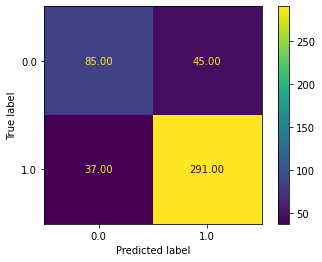

In [50]:
plot_confusion_matrix(model,X_test,y_test, values_format='.2f');

In [51]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67       130
         1.0       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [52]:
LR = classification_report(y_test,ytest_predict,output_dict=True)
df = pd.DataFrame(LR).transpose()
df
LR_Test_precision = round(df.loc["1.0"][0],2)
LR_Test_recall = round(df.loc["1.0"][1],2)
LR_Test_f1 = round(df.loc["1.0"][2],2)
print ('LR_Test_precision ',LR_Test_precision)
print ('LR_Test_recall ',LR_Test_recall)
print ('LR_Test_f1 ',LR_Test_f1)

LR_Test_precision  0.87
LR_Test_recall  0.89
LR_Test_f1  0.88


#### LDA Model

In [53]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

#### Getting the Predicted Classes and Probs

In [55]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.943417,0.056583
1,0.743056,0.256944
2,0.340433,0.659567
3,0.496549,0.503451
4,0.140949,0.859051


#### Model Evaluation

#### AUC and ROC for the training data

AUC: 0.889


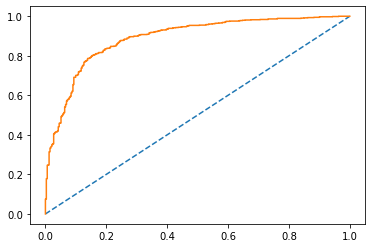

In [56]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_Train_Auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % LDA_Train_Auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [57]:
# Accuracy - Train Data
LDA_Train_Acc = model.score(X_train, y_train)
LDA_Train_Acc

0.8397375820056232

#### AUC and ROC for the test data

AUC: 0.884


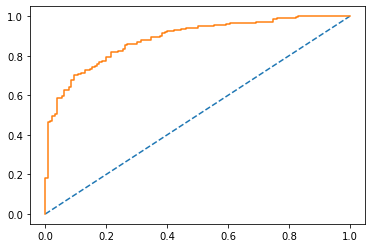

In [58]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_Test_Auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % LDA_Test_Auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [59]:
# Accuracy - Test Data
LDA_Test_Acc = model.score(X_test, y_test)
LDA_Test_Acc

0.8187772925764192

#### Confusion Matrix for the training data

In [60]:
confusion_matrix(y_train, ytrain_predict)

array([[230, 102],
       [ 68, 667]], dtype=int64)

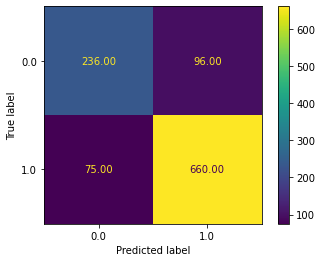

In [61]:
plot_confusion_matrix(model,X_train,y_train, values_format='.2f');

In [62]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73       332
         1.0       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [63]:
LDA = classification_report(y_train,ytrain_predict,output_dict=True)
df = pd.DataFrame(LDA).transpose()
df
LDA_Train_precision = round(df.loc["1.0"][0],2)
LDA_Train_recall = round(df.loc["1.0"][1],2)
LDA_Train_f1 = round(df.loc["1.0"][2],2)
print ('LDA_Train_precision ',LDA_Train_precision)
print ('LDA_Train_recall ',LDA_Train_recall)
print ('LDA_Train_f1 ',LDA_Train_f1)

LDA_Train_precision  0.87
LDA_Train_recall  0.91
LDA_Train_f1  0.89


#### Confusion Matrix for test data

In [64]:
confusion_matrix(y_test, ytest_predict)

array([[ 85,  45],
       [ 37, 291]], dtype=int64)

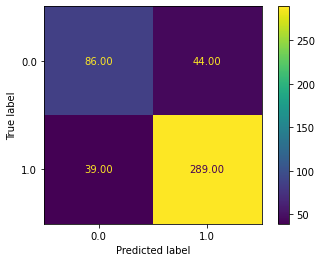

In [65]:
plot_confusion_matrix(model,X_test,y_test, values_format='.2f');

In [66]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67       130
         1.0       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [67]:
LDA = classification_report(y_test,ytest_predict,output_dict=True)
df = pd.DataFrame(LDA).transpose()
df
LDA_Test_precision = round(df.loc["1.0"][0],2)
LDA_Test_recall = round(df.loc["1.0"][1],2)
LDA_Test_f1 = round(df.loc["1.0"][2],2)
print ('LDA_Train_precision ',LDA_Test_precision)
print ('LDA_Train_recall ',LDA_Test_recall)
print ('LDA_Train_f1 ',LDA_Test_f1)

LDA_Train_precision  0.87
LDA_Train_recall  0.89
LDA_Train_f1  0.88


##### 1.2) Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel

[0.26419213973799127,
 0.23144104803493448,
 0.2139737991266376,
 0.20960698689956336,
 0.20742358078602618,
 0.21179039301310043,
 0.19432314410480345,
 0.18558951965065507,
 0.18558951965065507,
 0.18777292576419213]

#### Plot misclassification error vs k (with k value on X-axis) using matplotlib

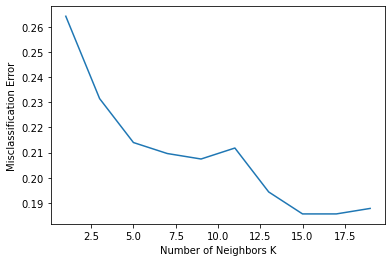

In [70]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [71]:
KNN_model=KNeighborsClassifier(n_neighbors=13)
KNN_model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

### Predicting on Training and Test dataset

In [72]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)

### Getting the Predicted Classes and Probs

In [73]:
ytest_predict_prob=KNN_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.692308,0.307692
1,0.769231,0.230769
2,0.307692,0.692308
3,0.307692,0.692308
4,0.461538,0.538462


In [74]:
ytrain_predict_prob=KNN_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.692308,0.307692
1,0.307692,0.692308
2,0.384615,0.615385
3,0.153846,0.846154
4,0.230769,0.769231


### Model Evaluation

In [75]:
# Accuracy - Training Data
KNN_Train_Acc = KNN_model.score(X_train, y_train)
KNN_Train_Acc

0.8303655107778819

### AUC and ROC for the training data

AUC: 0.898


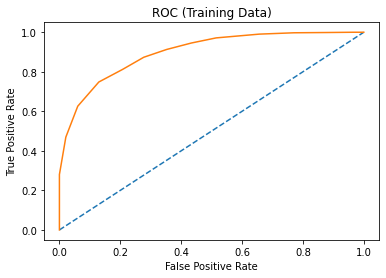

In [171]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_Train_Auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % KNN_Train_Auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Training Data)')
plt.plot(train_fpr, train_tpr);

In [172]:
# Accuracy - Test Data
KNN_Test_Acc = KNN_model.score(X_test, y_test)
KNN_Test_Acc

0.8056768558951966

### AUC and ROC for the test data

AUC: 0.876


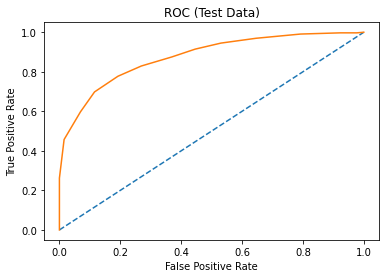

In [173]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_Test_Auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % KNN_Test_Auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Test Data)')
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [174]:
confusion_matrix(y_train, ytrain_predict)

array([[250,  82],
       [ 53, 682]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (Training Data)')

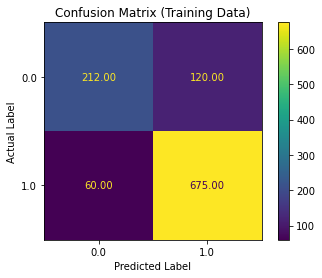

In [175]:
plot_confusion_matrix(best_grid,X_train,y_train,values_format='.2f');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Training Data)')

In [176]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.75      0.79       332
         1.0       0.89      0.93      0.91       735

    accuracy                           0.87      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067



In [177]:
KNN = classification_report(y_train,ytrain_predict,output_dict=True)
df = pd.DataFrame(KNN).transpose()
df
KNN_Train_precision = round(df.loc["1.0"][0],2)
KNN_Train_recall = round(df.loc["1.0"][1],2)
KNN_Train_f1 = round(df.loc["1.0"][2],2)
print ('LDA_Train_precision ',KNN_Train_precision)
print ('LDA_Train_recall ',KNN_Train_recall)
print ('LDA_Train_f1 ',KNN_Train_f1)

LDA_Train_precision  0.89
LDA_Train_recall  0.93
LDA_Train_f1  0.91


### Confusion Matrix for test data

In [178]:
confusion_matrix(y_test, ytest_predict)

array([[ 97,  33],
       [ 42, 286]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (Test Data)')

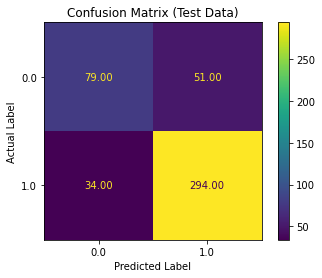

In [179]:
plot_confusion_matrix(best_grid,X_test,y_test,values_format='.2f');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Test Data)')

In [180]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72       130
         1.0       0.90      0.87      0.88       328

    accuracy                           0.84       458
   macro avg       0.80      0.81      0.80       458
weighted avg       0.84      0.84      0.84       458



In [181]:
KNN = classification_report(y_test,ytest_predict,output_dict=True)
df = pd.DataFrame(KNN).transpose()
df
KNN_Test_precision = round(df.loc["1.0"][0],2)
KNN_Test_recall = round(df.loc["1.0"][1],2)
KNN_Test_f1 = round(df.loc["1.0"][2],2)
print ('LDA_Train_precision ',KNN_Test_precision)
print ('LDA_Train_recall ',KNN_Test_recall)
print ('LDA_Train_f1 ',KNN_Test_f1)

LDA_Train_precision  0.9
LDA_Train_recall  0.87
LDA_Train_f1  0.88


#### Train Naive Bayes algorithm

In [182]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
vote_model = GaussianNB()

vote_model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

#### Performance of our model with training data

In [183]:
vote_train_predict = vote_model.predict(X_train)

from sklearn import metrics

NB_Train_Acc = metrics.accuracy_score(y_train, vote_train_predict)
NB_Train_Acc

0.8322399250234301

#### Performance of our model with testing data

In [184]:
vote_test_predict = vote_model.predict(X_test)
NB_Test_Acc = metrics.accuracy_score(y_test, vote_test_predict)
NB_Test_Acc

0.8231441048034934

#### Lets check the confusion matrix and classification report

Confusion Matrix


<AxesSubplot:>

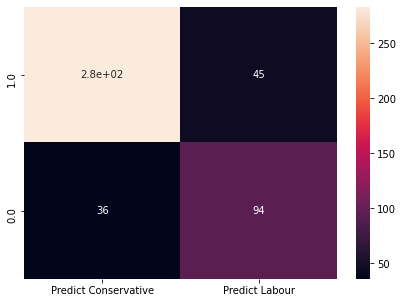

In [185]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, vote_test_predict, labels=[1.0, 0.0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1.0","0.0"]],
                  columns = [i for i in ["Predict Conservative","Predict Labour"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Confusion Matrix


<AxesSubplot:>

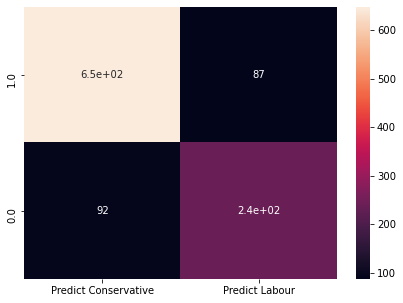

In [186]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_train, vote_train_predict, labels=[1.0, 0.0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1.0","0.0"]],
                  columns = [i for i in ["Predict Conservative","Predict Labour"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

AUC: 0.887


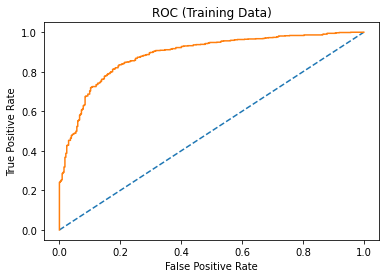

In [187]:
# predict probabilities
probs = vote_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_Train_Auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % NB_Train_Auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Training Data)')
plt.plot(train_fpr, train_tpr);

AUC: 0.885


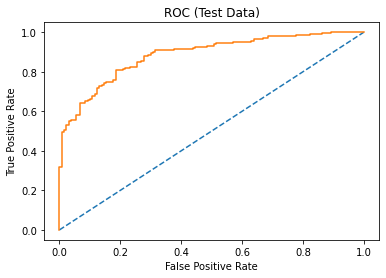

In [188]:
# predict probabilities
probs = vote_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_Test_Auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NB_Test_Auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Test Data)')
plt.plot(test_fpr, test_tpr);

In [189]:
print("Classification Report")
print(metrics.classification_report(y_train, vote_train_predict, labels=[1.0, 0.0]))

Classification Report
              precision    recall  f1-score   support

         1.0       0.88      0.88      0.88       735
         0.0       0.73      0.72      0.73       332

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [190]:
print("Classification Report")
print(metrics.classification_report(y_test, vote_test_predict, labels=[1.0, 0.0]))

Classification Report
              precision    recall  f1-score   support

         1.0       0.89      0.86      0.87       328
         0.0       0.68      0.72      0.70       130

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



In [191]:
NB = classification_report(y_train,ytrain_predict,output_dict=True)
df = pd.DataFrame(NB).transpose()
df
NB_Train_precision = round(df.loc["1.0"][0],2)
NB_Train_recall = round(df.loc["1.0"][1],2)
NB_Train_f1 = round(df.loc["1.0"][2],2)
print ('LDA_Train_precision ',NB_Train_precision)
print ('LDA_Train_recall ',NB_Train_recall)
print ('LDA_Train_f1 ',NB_Train_f1)

LDA_Train_precision  0.89
LDA_Train_recall  0.93
LDA_Train_f1  0.91


In [192]:
NB = classification_report(y_train,ytrain_predict,output_dict=True)
df = pd.DataFrame(NB).transpose()
df
NB_Test_precision = round(df.loc["1.0"][0],2)
NB_Test_recall = round(df.loc["1.0"][1],2)
NB_Test_f1 = round(df.loc["1.0"][2],2)
print ('LDA_Train_precision ',NB_Test_precision)
print ('LDA_Train_recall ',NB_Test_recall)
print ('LDA_Train_f1 ',NB_Test_f1)

LDA_Train_precision  0.89
LDA_Train_recall  0.93
LDA_Train_f1  0.91


### Tuning

#### Build Decision Tree Model

In [193]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
param_grid = {
    "criterion":['gini'],
    'max_depth': [10, 12, 15, 20],
    'min_samples_leaf': [20,30,50,100],
    'min_samples_split':[150,200,250,300]
}
dt_model = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dt_model, param_grid=param_grid,cv =10)

In [195]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'], 'max_depth': [10, 12, 15, 20],
                         'min_samples_leaf': [2

In [196]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 150}


In [197]:
best_grid = grid_search.best_estimator_
best_grid

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

### Scoring Decision Tree

In [198]:
print(best_grid.score(X_train, y_train))
print(best_grid.score(X_test, y_test))

0.8256794751640113
0.8056768558951966


### Variable Importance

In [199]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.483380
Europe                   0.234399
Blair                    0.155609
political.knowledge      0.102617
economic.cond.national   0.013140
economic.cond.household  0.009519
age                      0.001336
gender                   0.000000


#### Visualizing the Decision Tree

In [200]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Election_tree_regularized = open('Election_tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, 
                                out_file= Election_tree_regularized , 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

Election_tree_regularized.close()
dot_data

http://webgraphviz.com/

### Predicting on Training and Test dataset

In [201]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

#### Getting the Predicted Classes and Probs

In [202]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.894737,0.105263
1,0.894737,0.105263
2,0.195489,0.804511
3,0.195489,0.804511
4,0.464286,0.535714


In [203]:
ytrain_predict_prob=best_grid.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.464286,0.535714
1,0.464286,0.535714
2,0.195489,0.804511
3,0.224490,0.775510
4,0.195489,0.804511


#### Model Evaluation

In [204]:
# Accuracy - Training Data
CART_Train_Acc = best_grid.score(X_train, y_train)
CART_Train_Acc

0.8256794751640113

### AUC and ROC for the training data

AUC: 0.876


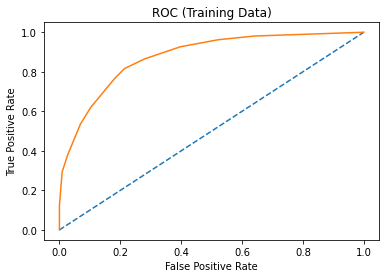

In [205]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
CART_Train_Auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % CART_Train_Auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Training Data)')
plt.plot(train_fpr, train_tpr);

In [206]:
# Accuracy - Test Data
CART_Test_Acc=best_grid.score(X_test, y_test)
CART_Test_Acc

0.8056768558951966

### AUC and ROC for the test data

AUC: 0.864


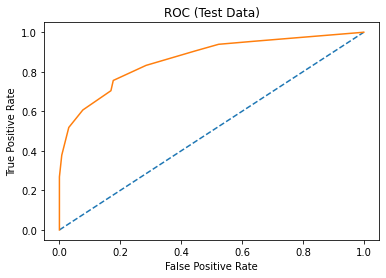

In [207]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
CART_Test_Auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % CART_Test_Auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Test Data)')
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [208]:
confusion_matrix(y_train, ytrain_predict)

array([[200, 132],
       [ 54, 681]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (Training Data)')

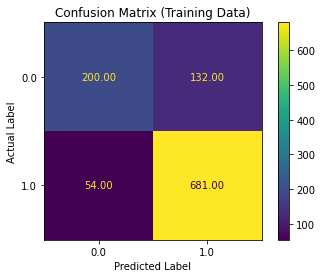

In [209]:
plot_confusion_matrix(best_grid,X_train,y_train,values_format='.2f');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Training Data)')

In [210]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.79      0.60      0.68       332
         1.0       0.84      0.93      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.76      0.78      1067
weighted avg       0.82      0.83      0.82      1067



In [211]:
CART = classification_report(y_train,ytrain_predict,output_dict=True)
df = pd.DataFrame(CART).transpose()
df
CART_Train_precision = round(df.loc["1.0"][0],2)
CART_Train_recall = round(df.loc["1.0"][1],2)
CART_Train_f1 = round(df.loc["1.0"][2],2)
print ('CART_Train_precision ',CART_Train_precision)
print ('CART_Train_recall ',CART_Train_recall)
print ('CART_Train_f1 ',CART_Train_f1)

CART_Train_precision  0.84
CART_Train_recall  0.93
CART_Train_f1  0.88


### Confusion Matrix for test data

In [212]:
confusion_matrix(y_test, ytest_predict)

array([[ 72,  58],
       [ 31, 297]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (Test Data)')

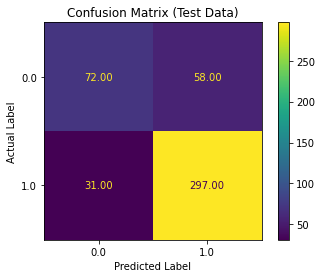

In [213]:
plot_confusion_matrix(best_grid,X_test,y_test,values_format='.2f');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Test Data)')

In [214]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.70      0.55      0.62       130
         1.0       0.84      0.91      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.73      0.74       458
weighted avg       0.80      0.81      0.80       458



In [215]:
CART = classification_report(y_test,ytest_predict,output_dict=True)
df = pd.DataFrame(CART).transpose()
df
CART_Test_precision = round(df.loc["1.0"][0],2)
CART_Test_recall = round(df.loc["1.0"][1],2)
CART_Test_f1 = round(df.loc["1.0"][2],2)
print ('CART_Test_precision ',CART_Test_precision)
print ('CART_Test_recall ',CART_Test_recall)
print ('CART_Test_f1 ',CART_Test_f1)

CART_Test_precision  0.84
CART_Test_recall  0.91
CART_Test_f1  0.87


## Random Forest

In [216]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'oob_score': [True],
    'max_depth': [10, 12],
    'max_features': [4, 6],
    'min_samples_leaf': [25, 30, 50],
    'min_samples_split': [90, 150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [217]:
grid_search.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [218]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 25,
 'min_samples_split': 90,
 'n_estimators': 501,
 'oob_score': True}

In [219]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=90,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [220]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [221]:
# Accuracy - Training Data
RFCL_Train_Acc = best_grid.score(X_train, y_train)
RFCL_Train_Acc

0.831302717900656

In [222]:
# Accuracy - Test Data
RFCL_Test_Acc = best_grid.score(X_test, y_test)
RFCL_Test_Acc

0.8144104803493449

In [223]:
confusion_matrix(y_train, ytrain_predict)

array([[212, 120],
       [ 60, 675]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (Training Data)')

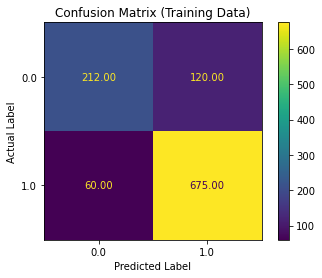

In [224]:
plot_confusion_matrix(best_grid,X_train,y_train,values_format='.2f');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Training Data)')

In [225]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.64      0.70       332
         1.0       0.85      0.92      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [226]:
RFCL = classification_report(y_train,ytrain_predict,output_dict=True)
df = pd.DataFrame(RFCL).transpose()
df
RFCL_Train_precision = round(df.loc["1.0"][0],2)
RFCL_Train_recall = round(df.loc["1.0"][1],2)
RFCL_Train_f1 = round(df.loc["1.0"][2],2)
print ('RFCL_Train_precision ',RFCL_Train_precision)
print ('RFCL_Train_recall ',RFCL_Train_recall)
print ('RFCL_Train_f1 ',RFCL_Train_f1)

RFCL_Train_precision  0.85
RFCL_Train_recall  0.92
RFCL_Train_f1  0.88


In [227]:
confusion_matrix(y_test, ytest_predict)

array([[ 79,  51],
       [ 34, 294]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (Test Data)')

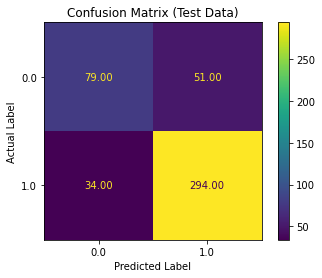

In [228]:
plot_confusion_matrix(best_grid,X_test,y_test,values_format='.2f');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Test Data)')

In [229]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65       130
         1.0       0.85      0.90      0.87       328

    accuracy                           0.81       458
   macro avg       0.78      0.75      0.76       458
weighted avg       0.81      0.81      0.81       458



In [230]:
RFCL = classification_report(y_test,ytest_predict,output_dict=True)
df = pd.DataFrame(RFCL).transpose()
df
RFCL_Test_precision = round(df.loc["1.0"][0],2)
RFCL_Test_recall = round(df.loc["1.0"][1],2)
RFCL_Test_f1 = round(df.loc["1.0"][2],2)
print ('RFCL_Train_precision ',RFCL_Test_precision)
print ('RFCL_Train_recall ',RFCL_Test_recall)
print ('RFCL_Train_f1 ',RFCL_Test_f1)

RFCL_Train_precision  0.85
RFCL_Train_recall  0.9
RFCL_Train_f1  0.87


AUC: 0.901


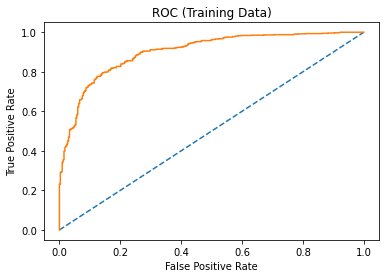

In [231]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RFCL_Train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % RFCL_Train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Training Data)')
plt.plot(train_fpr, train_tpr);

AUC: 0.892


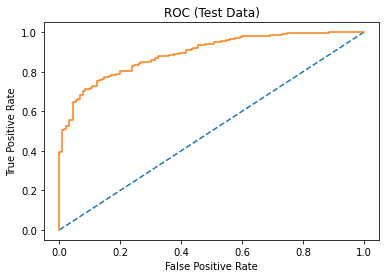

In [232]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RFCL_Test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RFCL_Test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Test Data)')
plt.plot(test_fpr, test_tpr);

## Ensemble Learning - Bagging

In [233]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=best_grid, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Predicting on Training and Test dataset

In [234]:
ytrain_predict = bgcl.predict(X_train)
ytest_predict = bgcl.predict(X_test)

### Model Evaluation

In [235]:
# Accuracy - Training Data
BG_Train_Acc = bgcl.score(X_train, y_train)
BG_Train_Acc

0.823805060918463

In [236]:
# Accuracy - Test Data
BG_Test_Acc = bgcl.score(X_test, y_test)
BG_Test_Acc

0.8187772925764192

AUC: 0.892


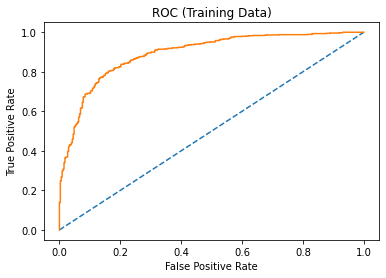

In [237]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
BG_Train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % BG_Train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Training Data)')
plt.plot(train_fpr, train_tpr);

AUC: 0.864


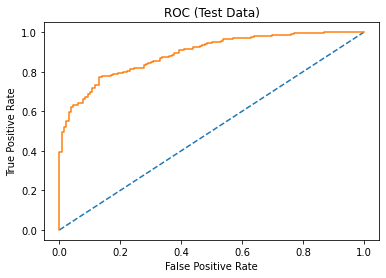

In [238]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
BG_Test_Auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % CART_Test_Auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Test Data)')
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [239]:
confusion_matrix(y_train, ytrain_predict)

array([[192, 140],
       [ 48, 687]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (Training Data)')

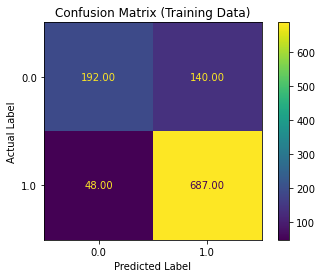

In [240]:
plot_confusion_matrix(bgcl,X_train,y_train,values_format='.2f');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Training Data)')

In [241]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.80      0.58      0.67       332
         1.0       0.83      0.93      0.88       735

    accuracy                           0.82      1067
   macro avg       0.82      0.76      0.78      1067
weighted avg       0.82      0.82      0.81      1067



In [242]:
BAGGING = classification_report(y_train,ytrain_predict,output_dict=True)
df = pd.DataFrame(BAGGING).transpose()
df
BG_Train_precision = round(df.loc["1.0"][0],2)
BG_Train_recall = round(df.loc["1.0"][1],2)
BG_Train_f1 = round(df.loc["1.0"][2],2)
print ('BG_Train_precision ',BG_Train_precision)
print ('BG_Train_recall ',BG_Train_recall)
print ('BG_Train_f1 ',BG_Train_f1)

BG_Train_precision  0.83
BG_Train_recall  0.93
BG_Train_f1  0.88


### Confusion Matrix for test data

In [243]:
confusion_matrix(y_test, ytest_predict)

array([[ 77,  53],
       [ 30, 298]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (Test Data)')

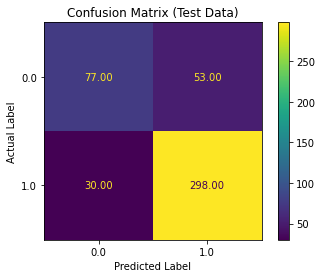

In [244]:
plot_confusion_matrix(bgcl,X_test,y_test,values_format='.2f');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Test Data)')

In [245]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.72      0.59      0.65       130
         1.0       0.85      0.91      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.75      0.76       458
weighted avg       0.81      0.82      0.81       458



In [246]:
BAGGING = classification_report(y_test,ytest_predict,output_dict=True)
df = pd.DataFrame(BAGGING).transpose()
df
BG_Test_precision = round(df.loc["1.0"][0],2)
BG_Test_recall = round(df.loc["1.0"][1],2)
BG_Test_f1 = round(df.loc["1.0"][2],2)
print ('BG_Train_precision ',BG_Test_precision)
print ('BG_Train_recall ',BG_Test_recall)
print ('BG_Train_f1 ',BG_Test_f1)

BG_Train_precision  0.85
BG_Train_recall  0.91
BG_Train_f1  0.88


## Ensemble Learning - AdaBoosting

In [247]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Predicting on Training and Test dataset

In [248]:
ytrain_predict = abcl.predict(X_train)
ytest_predict = abcl.predict(X_test)

### Model Evaluation

In [249]:
# Accuracy - Training Data
BS_Train_Acc = abcl.score(X_train, y_train)
BS_Train_Acc

0.8397375820056232

In [250]:
# Accuracy - Test Data
BS_Test_Acc = abcl.score(X_test, y_test)
BS_Test_Acc

0.8231441048034934

AUC: 0.901


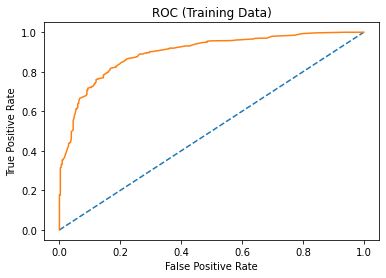

In [251]:
# predict probabilities
probs = abcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
BS_Train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % RFCL_Train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Training Data)')
plt.plot(train_fpr, train_tpr);

AUC: 0.864


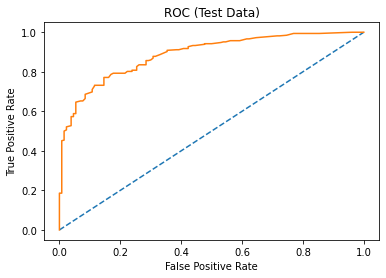

In [252]:
# predict probabilities
probs = abcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
BS_Test_Auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % CART_Test_Auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Test Data)')
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [253]:
print("Classification Report")
print(metrics.classification_report(y_test, vote_test_predict, labels=[1.0, 0.0]))

Classification Report
              precision    recall  f1-score   support

         1.0       0.89      0.86      0.87       328
         0.0       0.68      0.72      0.70       130

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



In [254]:
confusion_matrix(y_train, ytrain_predict)

array([[234,  98],
       [ 73, 662]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (Training Data)')

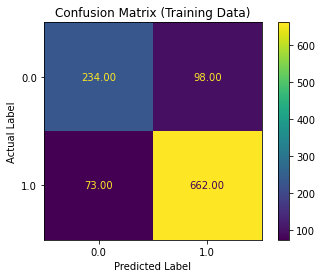

In [255]:
plot_confusion_matrix(abcl,X_train,y_train,values_format='.2f');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Training Data)')

In [256]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       332
         1.0       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [257]:
BOOSTING = classification_report(y_train,ytrain_predict,output_dict=True)
df = pd.DataFrame(BOOSTING).transpose()
df
BS_Train_precision = round(df.loc["1.0"][0],2)
BS_Train_recall = round(df.loc["1.0"][1],2)
BS_Train_f1 = round(df.loc["1.0"][2],2)
print ('BS_Train_precision ',BS_Train_precision)
print ('BS_Train_recall ',BS_Train_recall)
print ('BS_Train_f1 ',BS_Train_f1)

BS_Train_precision  0.87
BS_Train_recall  0.9
BS_Train_f1  0.89


### Confusion Matrix for test data

In [258]:
confusion_matrix(y_test, ytest_predict)

array([[ 90,  40],
       [ 41, 287]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (Test Data)')

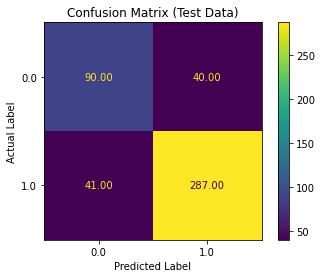

In [259]:
plot_confusion_matrix(abcl,X_test,y_test,values_format='.2f');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Test Data)')

In [260]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69       130
         1.0       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [261]:
BOOSTING = classification_report(y_test,ytest_predict,output_dict=True)
df = pd.DataFrame(BOOSTING).transpose()
df
BS_Test_precision = round(df.loc["1.0"][0],2)
BS_Test_recall = round(df.loc["1.0"][1],2)
BS_Test_f1 = round(df.loc["1.0"][2],2)
print ('BS_Test_precision ',BS_Test_precision)
print ('BS_Test_recall ',BS_Test_recall)
print ('BS_Test_f1 ',BS_Test_f1)

BS_Test_precision  0.88
BS_Test_recall  0.88
BS_Test_f1  0.88


## Ensemble Learning - GradientBoost

In [262]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [263]:
ytrain_predict = gbcl.predict(X_train)
ytest_predict = gbcl.predict(X_test)

In [264]:
# Accuracy - Training Data
GBS_Train_Acc = gbcl.score(X_train, y_train)
GBS_Train_Acc

0.8734770384254921

In [265]:
# Accuracy - Testing Data
GBS_Test_Acc = gbcl.score(X_test, y_test)
GBS_Test_Acc

0.8362445414847162

AUC: 0.901


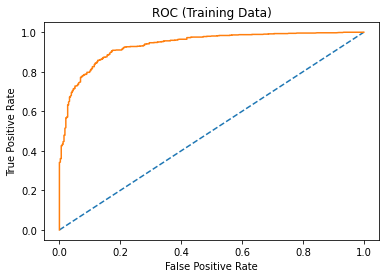

In [266]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GBS_Train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % RFCL_Train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Training Data)')
plt.plot(train_fpr, train_tpr);

AUC: 0.864


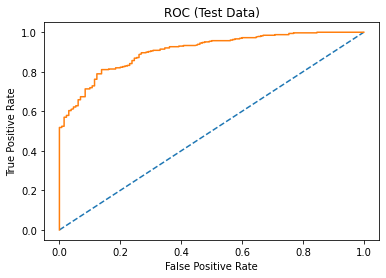

In [267]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GBS_Test_Auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % CART_Test_Auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Test Data)')
plt.plot(test_fpr, test_tpr);

## Confusion Matrix for the training data

In [268]:
confusion_matrix(y_train, ytrain_predict)

array([[250,  82],
       [ 53, 682]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (Training Data)')

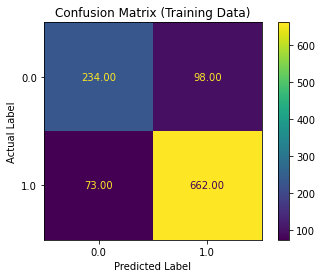

In [269]:
plot_confusion_matrix(abcl,X_train,y_train,values_format='.2f');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Training Data)')

In [270]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.75      0.79       332
         1.0       0.89      0.93      0.91       735

    accuracy                           0.87      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067



In [271]:
BOOSTING = classification_report(y_train,ytrain_predict,output_dict=True)
df = pd.DataFrame(BOOSTING).transpose()
df
GBS_Train_precision = round(df.loc["1.0"][0],2)
GBS_Train_recall = round(df.loc["1.0"][1],2)
GBS_Train_f1 = round(df.loc["1.0"][2],2)
print ('BS_Train_precision ',BS_Train_precision)
print ('BS_Train_recall ',BS_Train_recall)
print ('BS_Train_f1 ',BS_Train_f1)

BS_Train_precision  0.87
BS_Train_recall  0.9
BS_Train_f1  0.89


## Confusion Matrix for test data

In [272]:
confusion_matrix(y_test, ytest_predict)

array([[ 97,  33],
       [ 42, 286]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (Test Data)')

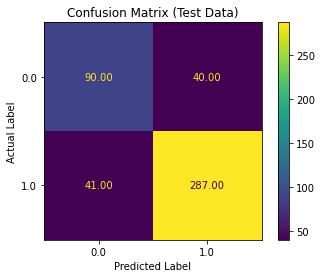

In [273]:
plot_confusion_matrix(abcl,X_test,y_test,values_format='.2f');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Test Data)')

In [274]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72       130
         1.0       0.90      0.87      0.88       328

    accuracy                           0.84       458
   macro avg       0.80      0.81      0.80       458
weighted avg       0.84      0.84      0.84       458



In [275]:
BOOSTING = classification_report(y_test,ytest_predict,output_dict=True)
df = pd.DataFrame(BOOSTING).transpose()
df
GBS_Test_precision = round(df.loc["1.0"][0],2)
GBS_Test_recall = round(df.loc["1.0"][1],2)
GBS_Test_f1 = round(df.loc["1.0"][2],2)
print ('BS_Test_precision ',BS_Test_precision)
print ('BS_Test_recall ',BS_Test_recall)
print ('BS_Test_f1 ',BS_Test_f1)

BS_Test_precision  0.88
BS_Test_recall  0.88
BS_Test_f1  0.88


In [290]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RANDOM FOREST', RandomForestClassifier()))
models.append(('BAGGING', BaggingClassifier()))
models.append(('ADABOOSTING', AdaBoostClassifier()))
models.append(('GRADIENT BOOSTING', GradientBoostingClassifier()))

In [291]:
from sklearn import model_selection
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

LR: 0.832792 (0.038263)
LDA: 0.830826 (0.038084)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was pass

KNN: 0.790863 (0.033684)
CART: 0.748241 (0.025108)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

NB: 0.829515 (0.024624)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

RANDOM FOREST: 0.819032 (0.026118)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

BAGGING: 0.798757 (0.027945)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

ADABOOSTING: 0.819698 (0.029124)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

GRADIENT BOOSTING: 0.830177 (0.030314)


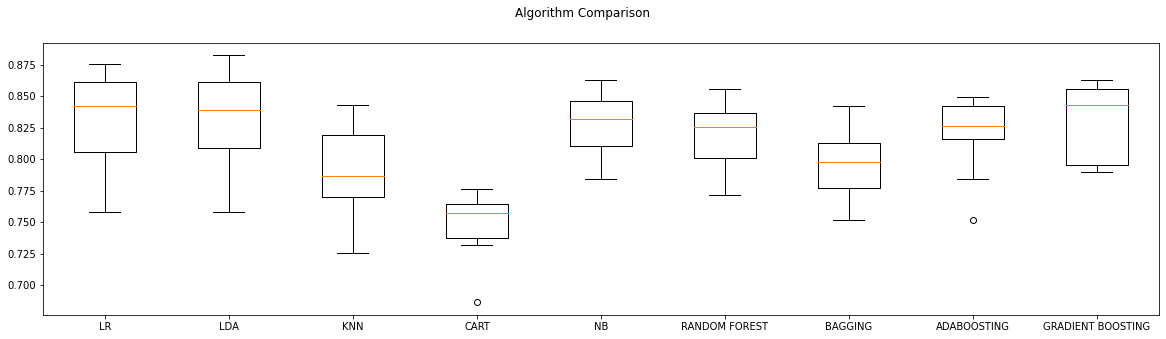

In [292]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(20,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [279]:
print('Comparison of Models : Train set')
index=['Accuracy', 'AUC','Precision','Recall','F1 Score']
data = pd.DataFrame({'LR':[LR_Train_Acc,LR_Train_Auc, LR_Train_precision,LR_Train_recall,LR_Train_f1],
        'LDA':[LDA_Train_Acc,LDA_Train_Auc,LDA_Train_precision,LDA_Train_recall,LDA_Train_f1],
       'KNN':[KNN_Train_Acc,KNN_Train_Auc,KNN_Train_precision,KNN_Train_recall,KNN_Train_f1],
        'CART':[CART_Train_Acc,CART_Train_Auc,CART_Train_precision,CART_Train_recall,CART_Train_f1],
       'NB':[NB_Train_Acc,NB_Train_Auc,NB_Train_precision,NB_Train_recall,NB_Train_f1],
        'RANDOM FOREST':[RFCL_Train_Acc, RFCL_Train_auc, RFCL_Train_precision,RFCL_Train_recall,RFCL_Train_f1],
        'BAGGING':[BG_Train_Acc, BG_Train_auc, BG_Train_precision,BG_Train_recall,BG_Train_f1],
        'ADABOOSTING':[BS_Train_Acc, BS_Train_auc, BS_Train_precision,BS_Train_recall,BS_Train_f1],
        'GRADIENT BOOSTING':[GBS_Train_Acc, GBS_Train_auc, GBS_Train_precision,GBS_Train_recall,GBS_Train_f1]},index=index)
round(data,2)

Comparison of Models : Train set


,LR,LDA,KNN,CART,NB,RANDOM FOREST,BAGGING,ADABOOSTING,GRADIENT BOOSTING
Accuracy,0.84,0.84,0.83,0.83,0.83,0.83,0.82,0.84,0.87
AUC,0.89,0.89,0.90,0.88,0.89,0.90,0.89,0.90,0.94
Precision,0.87,0.87,0.89,0.84,0.89,0.85,0.83,0.87,0.89
Recall,0.91,0.91,0.93,0.93,0.93,0.92,0.93,0.90,0.93
F1 Score,0.89,0.89,0.91,0.88,0.91,0.88,0.88,0.89,0.91


In [283]:
print('Comparison of Models : Test set')
index=['Accuracy', 'AUC','Precision','Recall','F1 Score']
data = pd.DataFrame({'LR':[LR_Test_Acc,LR_Test_Auc, LR_Test_precision,LR_Test_recall,LR_Test_f1],
        'LDA':[LDA_Test_Acc,LDA_Test_Auc,LDA_Test_precision,LDA_Test_recall,LDA_Test_f1],
       'KNN':[KNN_Test_Acc,KNN_Test_Auc,KNN_Test_precision,KNN_Test_recall,KNN_Test_f1],
        'CART':[CART_Test_Acc,CART_Test_Auc,CART_Test_precision,CART_Test_recall,CART_Test_f1],
       'NB':[NB_Test_Acc,NB_Test_Auc,NB_Test_precision,NB_Test_recall,NB_Test_f1],
        'RANDOM FOREST':[RFCL_Test_Acc, RFCL_Test_auc, RFCL_Test_precision,RFCL_Test_recall,RFCL_Test_f1],
        'BAGGING':[BG_Test_Acc, BG_Test_Auc, BG_Test_precision,BG_Test_recall,BG_Test_f1],
        'ADABOOSTING':[BS_Test_Acc, BS_Test_Auc, BS_Test_precision,BS_Test_recall,BS_Test_f1],
        'GRADIENT BOOSTING':[GBS_Test_Acc, GBS_Test_Auc, GBS_Test_precision,GBS_Test_recall,GBS_Test_f1]},index=index)
round(data,2)

Comparison of Models : Test set


,LR,LDA,KNN,CART,NB,RANDOM FOREST,BAGGING,ADABOOSTING,GRADIENT BOOSTING
Accuracy,0.82,0.82,0.81,0.81,0.82,0.81,0.82,0.82,0.84
AUC,0.88,0.88,0.88,0.86,0.88,0.89,0.89,0.89,0.91
Precision,0.87,0.87,0.90,0.84,0.89,0.85,0.85,0.88,0.90
Recall,0.89,0.89,0.87,0.91,0.93,0.90,0.91,0.88,0.87
F1 Score,0.88,0.88,0.88,0.87,0.91,0.87,0.88,0.88,0.88
